In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
def load_images(path):
    images = []
    for label in os.listdir(path):
        image_path = os.path.join(path, label)
        image=cv.imread(image_path)
        #resize image
        image = cv.resize(image, (512, 512))
        images.append(image)
    return np.array(images)

def blurring_image(images):
    blurred_images=[]
    for image in images:
        blur = cv.GaussianBlur(image, (5, 5), 1)
        blurred_images.append(blur)
    return blurred_images

def canny_edge_detection(blurred_images):
    edges_images=[]
    for image in blurred_images:
        edges = cv.Canny(image, 50, 150)
        edges_images.append(edges)
    return edges_images

def histogram_equalization_rgb(images):
    equalized_images = []
    for image in images:
        # Convert RGB image to HSV
        hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
        h, s, v = cv.split(hsv_image)
        
        # Histogram equalization on the V channel
        hist, bins = np.histogram(v.flatten(), bins=256, range=[0, 256])
        cdf = hist.cumsum()  # Cumulative Distribution Function
        cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
        cdf_normalized = cdf_normalized.astype('uint8')
        
        # Map the intensity values using the normalized CDF
        equalized_v = cdf_normalized[v]
        
        # Merge equalized V with original H and S
        equalized_hsv = cv.merge((h, s, equalized_v))
        equalized_image = cv.cvtColor(equalized_hsv, cv.COLOR_HSV2RGB)
        equalized_images.append(equalized_image)
        
    return equalized_images

In [9]:
images=load_images('Images')
blurred_images=blurring_image(images)
edges_images=canny_edge_detection(blurred_images)
equalized_images=histogram_equalization_rgb(images)

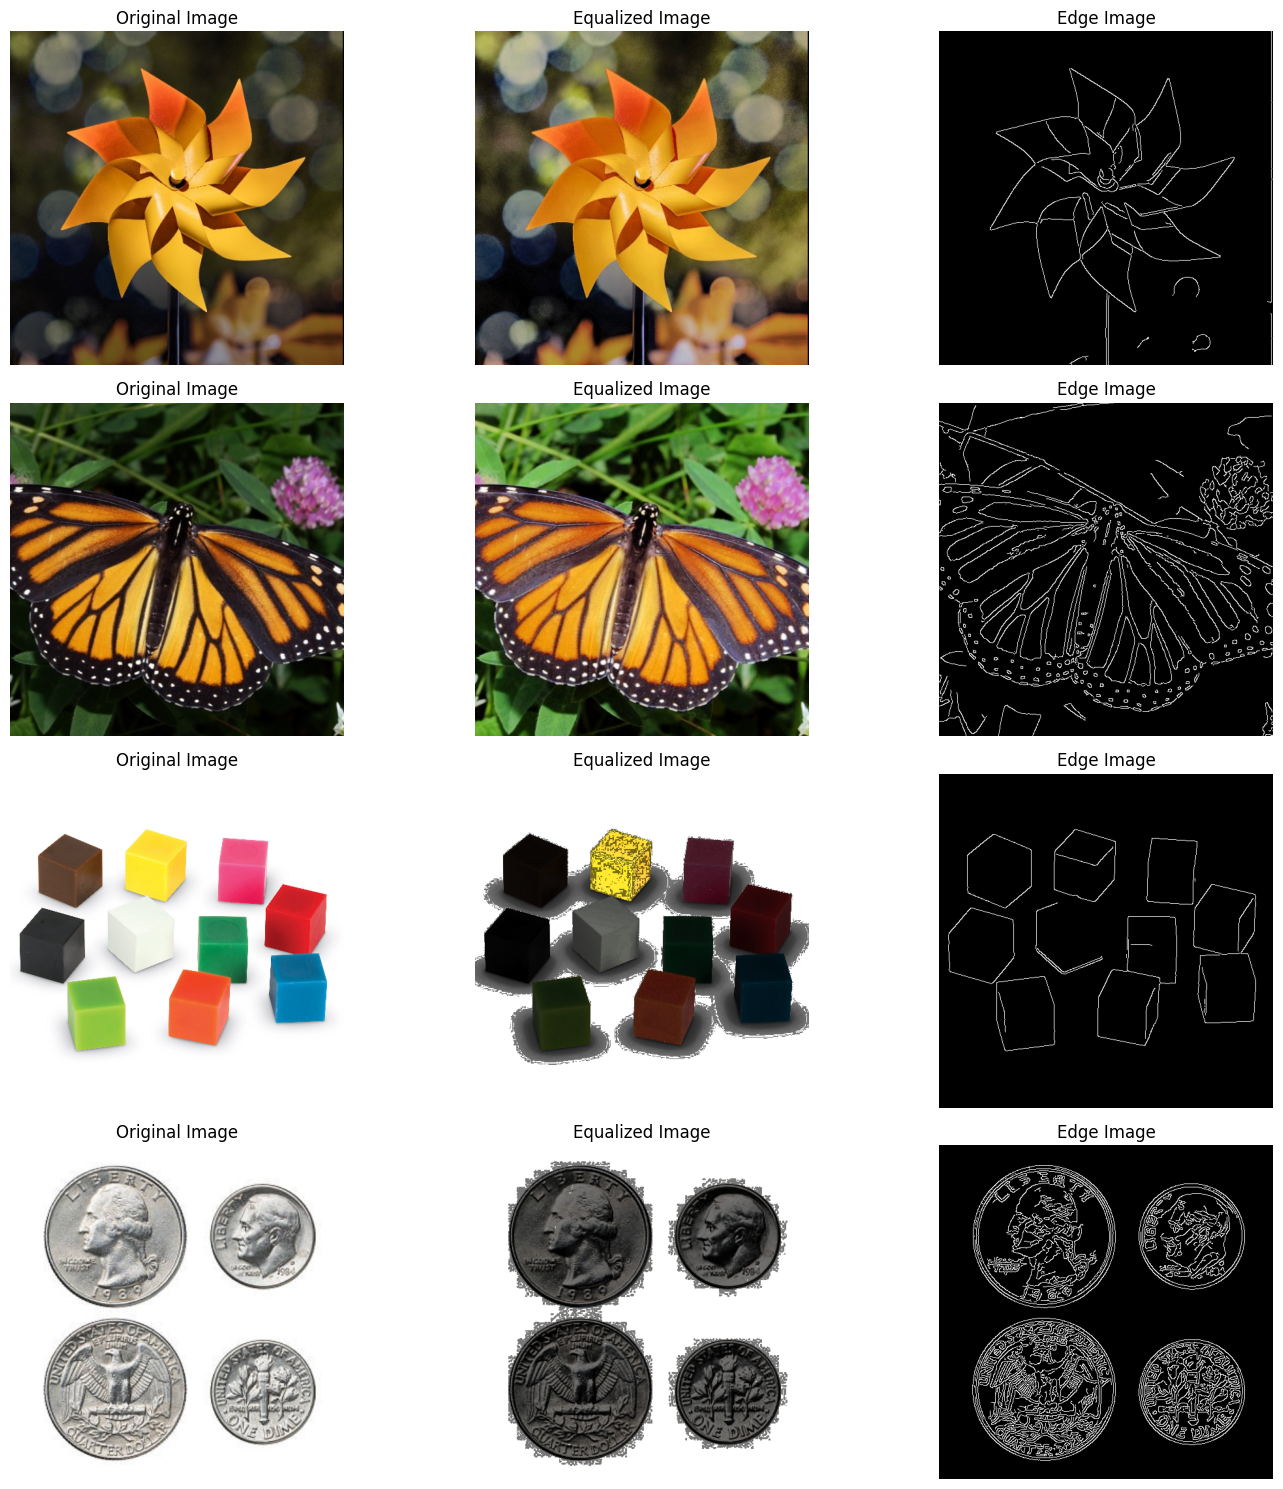

In [10]:
fig, axes = plt.subplots(len(images), 3, figsize=(15, 15))

for i in range(len(images)):
    axes[i, 0].imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(cv.cvtColor(equalized_images[i], cv.COLOR_BGR2RGB))
    axes[i, 1].set_title('Equalized Image')
    axes[i, 1].axis('off')
    
    axes[i, 2].imshow(edges_images[i], cmap='gray')
    axes[i, 2].set_title('Edge Image')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


                                                                Histogram Equalization